# SARIMA - Seasonal Auto regression Integrated Moving Average

* For Both, Trend and Seasonality

#### SARIMA(p,d,q)(P,D,Q)m
* p,d,q is same like ARIMA
* P - Seasonal Autoregressive Order
* D - Seasonal Difference Order
* Q - Seasonal Moving Average Order
* m - the Number of time Steps for a single Seasonal Period


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [6]:
df = pd.read_csv('E:/Time Series Analysis and Forecasting Using Python/Time Series - Basics(Data and Code)/us-airlines-monthly-aircraft-miles-flown.csv', header = 0, parse_dates = [0])

In [7]:
df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [8]:
df.tail()

,Month,MilesMM
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595
95,1970-12-01,12772


In [9]:
df.index = df.Month

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
result_a = seasonal_decompose(df.MilesMM, model='Multiplicative')

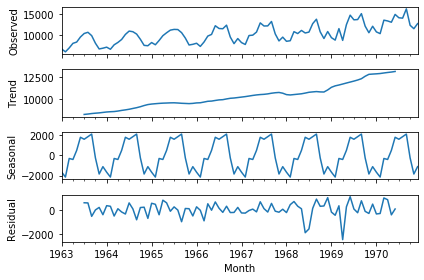

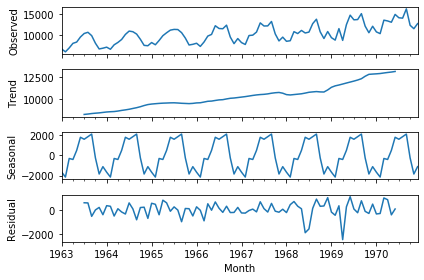

In [14]:
result_a.plot()

In [16]:
model = SARIMAX(df.MilesMM, order=(5,1,3), seasonal_order=(1,1,1,12))

C:\Users\pravi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [17]:
model_fit = model.fit()

C:\Users\pravi\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\pravi\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\pravi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [18]:
residuals = model_fit.resid

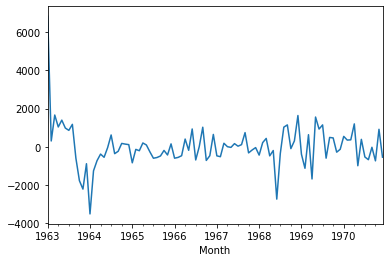

In [19]:
residuals.plot()

In [20]:
output = model_fit.forecast()

In [21]:
output

1971-01-01    11475.532536
Freq: MS, dtype: float64

In [22]:
output1 = model_fit.forecast(12)

In [23]:
output1

1971-01-01    11475.532536
1971-02-01    11153.475571
1971-03-01    13669.193151
1971-04-01    12646.965728
1971-05-01    14338.968298
1971-06-01    15785.964758
1971-07-01    14978.849458
1971-08-01    15362.266461
1971-09-01    16962.519721
1971-10-01    13682.001475
1971-11-01    12426.693158
1971-12-01    13729.808264
Freq: MS, dtype: float64

In [24]:
yhat = model_fit.predict()

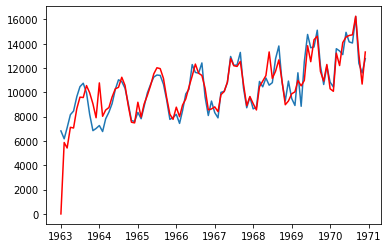

In [25]:
plt.plot(df.MilesMM)
plt.plot(yhat, color='red')